# Make figure 3
## Combine heatmap, barplot, and NMDS into multipanel figure
### Copy in needed code from each of those scripts

In [90]:
suppressMessages(library(plyr))
suppressMessages(library(tidyverse))
suppressMessages(library(vegan))
suppressMessages(library(zCompositions))
suppressMessages(library(compositions))

### (a) Heatmap

In [92]:
# Import module
source("../modules/7_Corr_heatmap_module_v0.1.R")

# Import data
Taxons3d <- read.table("../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", header = T)
#CH4corrRanksOTU <- read.table("correlations/CH4corrRanks_SilvaOTU.txt", sep = '\t')
#names(CH4corrRanksOTU)
CH4corrRanks <- read.table("correlations/CH4corrRanks_Silva_genus_CB.txt", sep = '\t') %>%
    dplyr::select(-Taxonomy_r)

pdf 
  2

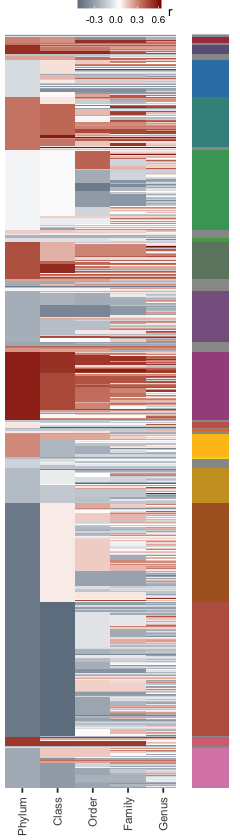

In [93]:
# Drop OTU level data (Taxonomy_r and OTU_r columns). Don't do if using CB table because already dropped above.
# CH4corrRanks <- CH4corrRanksOTU[,1:(ncol(CH4corrRanksOTU)-2)]
Tax_corrU <- unique(CH4corrRanks)

# Make plot
figure3a <- Tax_heat_corrRanks(Taxons3d, Tax_corrU, heat_cols=grey_red)

options(repr.plot.width = 2, repr.plot.height = 7)

figure3a

pdf("../figs/Figure3a.pdf", width = 1.05, height = 4)
figure3a
dev.off()

### (b) Barplot

Using Taxonomy as id variables



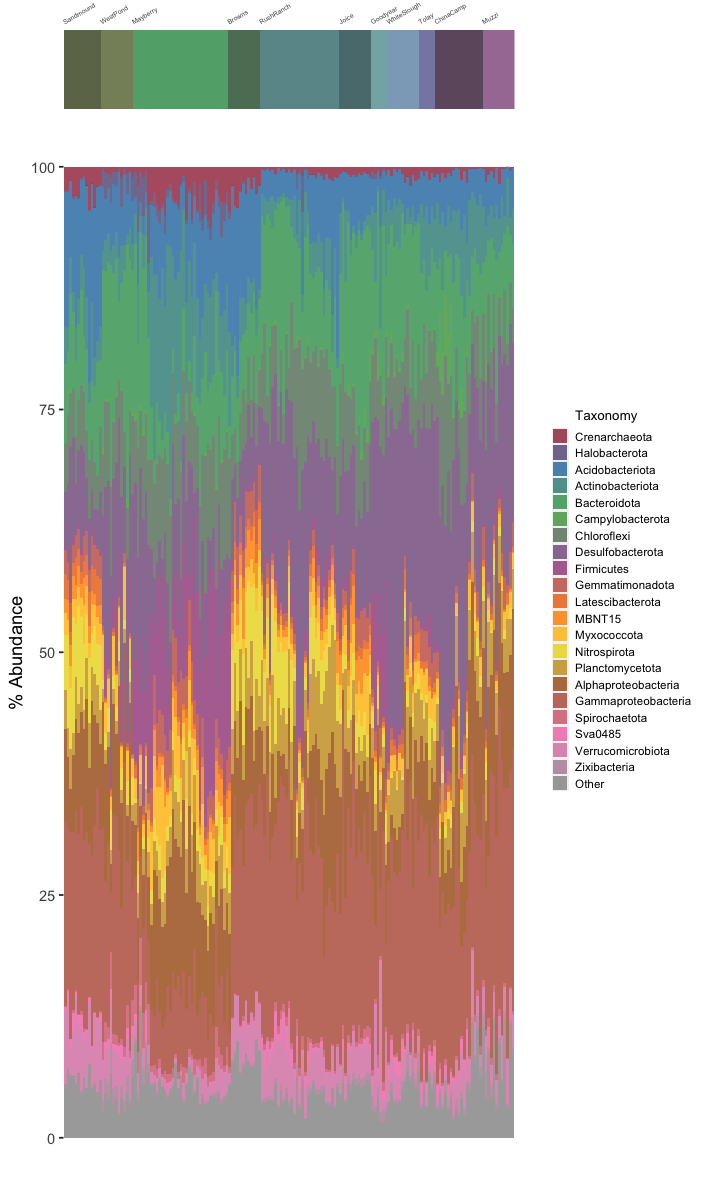

In [94]:
# Import module
source("../modules/5_OTU_barplots_module_v0.4.R")

# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <- SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!
otu_V <- SilvaOTUs

# Sort OTU table                                                                      
otu_V <- otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

# Metadata
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <-c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)

# SILVA color pallete
Silva_colors <- read.table("../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", header = T)

# Make plot
figure3b <- abund_loc_barplot(otu_V, "Taxonomy", metaDB, order_var = "EWsiteHyd_index", plot = "",
                               colors = Silva_colors, color_set = Silva_colors, relab="% Abundance")

options(repr.plot.width = 6, repr.plot.height = 10)

figure3b

#pdf("../figs/Figure3b.pdf", width = 5, height = 4)
#figure3b
#dev.off()

### (c) NMDS

Square root transformation
Wisconsin double standardization
Run 0 stress 0.06596923 
Run 1 stress 0.06586666 
... New best solution
... Procrustes: rmse 0.004437684  max resid 0.05442275 
Run 2 stress 0.06596913 
... Procrustes: rmse 0.004443963  max resid 0.05447712 
Run 3 stress 0.06586663 
... New best solution
... Procrustes: rmse 0.0002126694  max resid 0.001755799 
... Similar to previous best
Run 4 stress 0.06596909 
... Procrustes: rmse 0.004443503  max resid 0.05440412 
Run 5 stress 0.06586708 
... Procrustes: rmse 0.0001422126  max resid 0.001238211 
... Similar to previous best
Run 6 stress 0.06596904 
... Procrustes: rmse 0.004447603  max resid 0.05442229 
Run 7 stress 0.06586697 
... Procrustes: rmse 0.0001378707  max resid 0.001245697 
... Similar to previous best
Run 8 stress 0.06596923 
... Procrustes: rmse 0.004472817  max resid 0.05454314 
Run 9 stress 0.0659692 
... Procrustes: rmse 0.004465895  max resid 0.0545063 
Run 10 stress 0.06596935 
... Procrustes: rmse 0.00

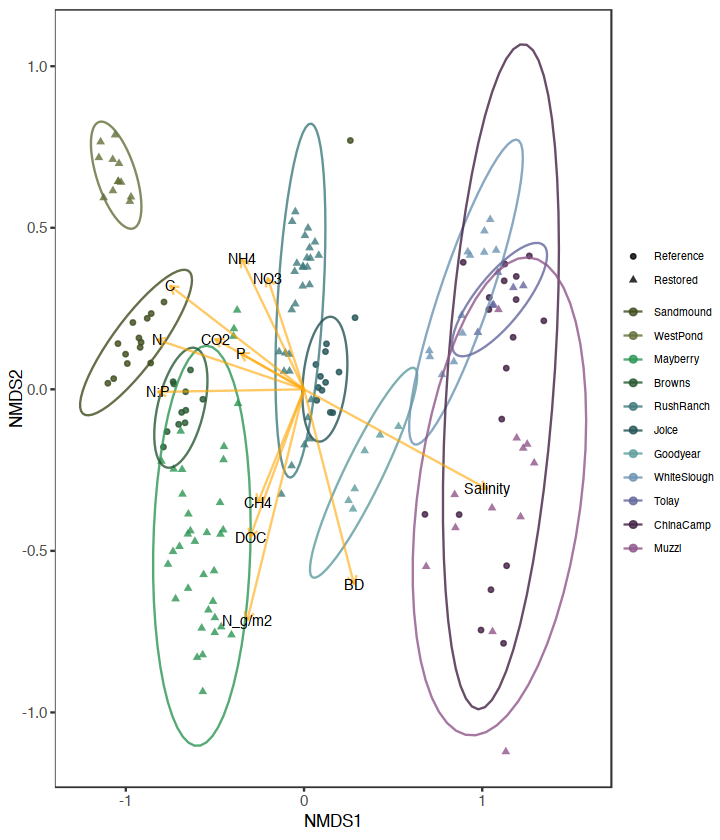

In [17]:
# Import OTU Table
OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)

# Sort OTU table                                                                      
otu_V <- OTU_v[order(OTU_v$Consensus.lineage),]

# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)          # site_colors
site_colours <- (site_colors$Salpal3_col)                                                                   # only color
site_col <- site_colours

# Import Sample mapping
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3b_gap_fill_MDS.txt", sep="\t", header=TRUE)          # Import Metadata, keep all    
#metaDB <-read.table("SF_sal_meta_FIX3b.txt", sep="\t", header=TRUE)          # Import Metadata, keep all    
row.names(metaDB) <- metaDB$Sample                                          # Row names are samples for phyloseq             
metaDB = metaDB[,-1]

# Get matching OTU samples and metadata samples (now done by preprocess?)
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')
rownames(Meta_iTag) <- Meta_iTag$Sample

# Resort meta itag by index
indexer = 'EWsiteHyd_index'
Meta_iTag <- Meta_iTag[order(Meta_iTag[indexer]),]

# Reorder factors as needed
# Reorder location factor
Meta_iTag$Location <-factor(Meta_iTag$Location, levels=c("Sandmound","WestPond","Mayberry","Browns","RushRanch","Joice","Goodyear","WhiteSlough","Tolay","ChinaCamp","Muzzi"))  #head(Meta_iTag)
Meta_iTag$Pl_Sp <-factor(Meta_iTag$Pl_Sp, levels=c("Cattail","Tule","ThreeSq","CattailNL","Phrag","PW","Cord"))

# Def NMDS vars
# Prepare data, cats for NMDS plot  -- move up to top or in function?
Location <- Meta_iTag$Location   # Get Location vector from meta_iTag
Restor <- Meta_iTag$EWcoastGroup
Plant <- Meta_iTag$Pl_Sp

# Make sure data used for NMDS is numeric
chem_cols <- sapply(Meta_iTag, is.numeric)  
Env_chem <- Meta_iTag[chem_cols]

### Select and rename vars
keep_vars <- c('Salinity.x', 'Bulk_dens', 'CO2_mg_m2_h', 'CH4_ug_m2_h', 'C', 'N', 'P', 'N_g_m2', #'C_g_m2', 
              'CN','NP', 'NO3_N', 'NH4_N', 'DOC_mg_L')#, 'NO2_pw','NO3_pw','NH3_pw',)#,

Env_chem <- Env_chem[keep_vars]

### CAREFUL HERE, lazy renaming... comment out when testing newvars.
colnames(Env_chem) <- c('Salinity', 'BD', 'CO2', 'CH4', 'C', 'N', 'P', 'N_g/m2',                  #'C_m2', 
                       'C:N', 'N:P', 'NO3_s', 'NH4_s', 'DOC')#, 'NO2_pw','NO3_pw','NH3_pw')

# Import module
source("../modules/4_OTU_plotting_module_NMDS_1.7.r")

# Make plot
figure3c <- NMDS_group_shape_fit(otu_V, Location, Restor, Env_chem)

options(repr.plot.width = 6, repr.plot.height = 7)

figure3c

#pdf("../figs/Figure3c.pdf", width = 6, height = 6)
#figure3c
#dev.off()


## Make multipanel figure

pdf 
  2

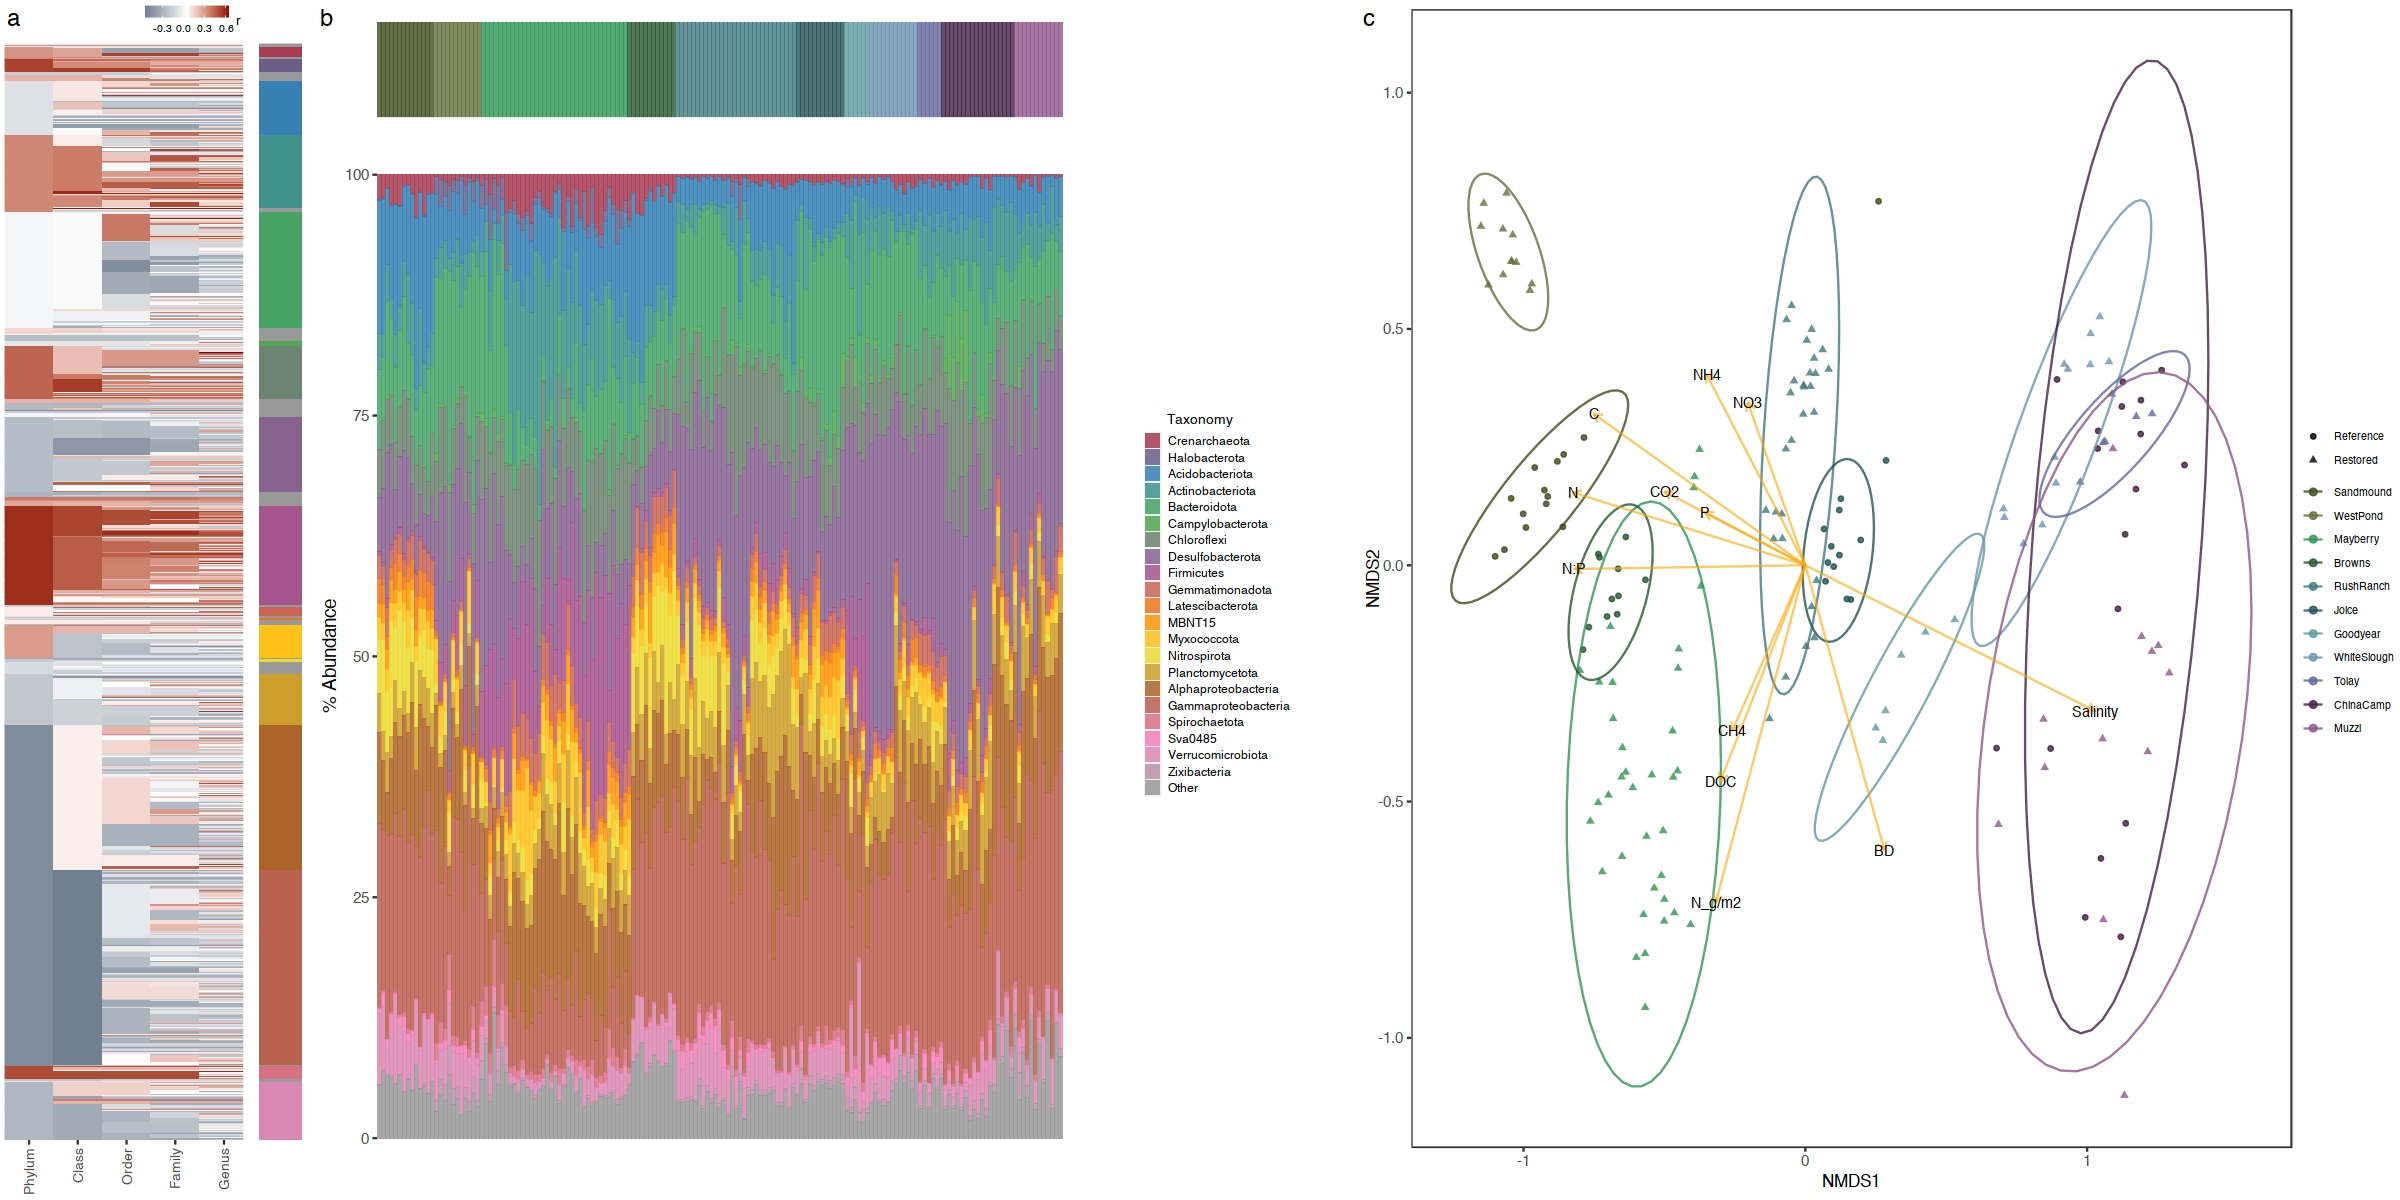

In [18]:
options(repr.plot.width = 20, repr.plot.height = 10)
figure3 <- plot_grid(figure3a, figure3b, figure3c, ncol = 3, align = "hv", rel_widths = c(0.6, 2, 2), axis = "t",
                    labels = c("a", "b", "c"))
figure3

pdf("../figs/Figure3.pdf", width = 11, height = 4)
figure3
dev.off()

# Update ordination with clt, Aichtison's distance, and PCA
## Also rerun PERMANOVA

In [96]:
# Import non VST cpm OTU table
OTU_v <- read.table("../silvaOTUs/Silva_OTU_PP.txt", sep = '\t', header = T, row.names = 1) %>%
    dplyr::select(-OTU, -Consensus.lineage, -Kingdom, -Phylum, -Class, -Order, -Family, -Genus) %>%
    t() %>%
    as.data.frame()

In [97]:
dim(OTU_v)

[1]  168 6275

In [98]:
# Import metadata as above
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)          # site_colors
site_colours <- (site_colors$Salpal3_col)                                                                   # only color
site_col <- site_colours

# Import Sample mapping
metaDB <- read.table("../data/meta/SF_sal_meta_FIX3b_gap_fill_MDS.txt", sep="\t", header=TRUE) # Import Metadata, keep all      
row.names(metaDB) <- metaDB$Sample # Row names are samples for phyloseq             
metaDB = metaDB[,-1]

# Get matching OTU samples and metadata samples (now done by preprocess?)
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample' = rownames(OTU_v))

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by = 'Sample')
rownames(Meta_iTag) <- Meta_iTag$Sample

# Resort meta itag by index
indexer = 'EWsiteHyd_index'
Meta_iTag <- Meta_iTag[order(Meta_iTag[indexer]),]

# Reorder factors as needed
Meta_iTag$Location <- factor(Meta_iTag$Location, levels=c("Sandmound","WestPond","Mayberry","Browns","RushRanch","Joice","Goodyear","WhiteSlough","Tolay","ChinaCamp","Muzzi"))
Meta_iTag$Pl_Sp <- factor(Meta_iTag$Pl_Sp, levels=c("Cattail","Tule","ThreeSq","CattailNL","Phrag","PW","Cord"))

# Def ordination vars
Location <- Meta_iTag$Location # Get Location vector from meta_iTag
Restor <- Meta_iTag$EWcoastGroup
Plant <- Meta_iTag$Pl_Sp

# Make sure data used for ordination is numeric
chem_cols <- sapply(Meta_iTag, is.numeric)  
Env_chem <- Meta_iTag[chem_cols]

### Select and rename vars
keep_vars <- c('Salinity.x', 'Bulk_dens', 'CO2_mg_m2_h', 'CH4_ug_m2_h', 'C', 'N', 'P', 'N_g_m2',
              'CN','NP', 'NO3_N', 'NH4_N', 'DOC_mg_L')

Env_chem <- Env_chem[keep_vars]

### CAREFUL HERE, lazy renaming... comment out when testing newvars.
colnames(Env_chem) <- c('Salinity', 'BD', 'CO2', 'CH4', 'C', 'N', 'P', 'N_g/m2',
                       'C:N', 'N:P', 'NO3_s', 'NH4_s', 'DOC')


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


In [99]:
# CLT transformation
otu_czm <- cmultRepl(OTU_v, label = 0, method = "CZM")
otu_clr <- clr(otu_czm)
aclr <- compositions::dist(otu_clr)

Warning message in cmultRepl(OTU_v, label = 0, method = "CZM"):
“Column(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                    (You can use the z.warning argument to modify the warning threshold).”
Warning message in cmultRepl(OTU_v, label = 0, method = "CZM"):
“Row(s) containing more than 80% zeros/unobserved values were found (check it out using zPatterns).
                  (You can use the z.warning argument to modify the warning threshold).”


No. adjusted imputations:  13110 


In [100]:
# PCA
d.pcx <- prcomp(aclr)
Meta_iTag$Axis01 <- d.pcx$rotation[,1]
Meta_iTag$Axis02 <- d.pcx$rotation[,2]

# Sum the total variance
d.mvar <- sum(d.pcx$sdev^2)

# Calculate PC1 and PC2 variance
PC1 <- paste("PC1: ", round((sum(d.pcx$sdev[1]^2)/d.mvar)*100, 1), "%")
PC2 <- paste("PC2: ", round((sum(d.pcx$sdev[2]^2)/d.mvar)*100, 1), "%")

[1] 0


***VECTORS

              PC1      PC2     r2 Pr(>r)    
Salinity  0.97494  0.22245 0.6752  0.001 ***
BD        0.23259  0.97257 0.4345  0.001 ***
CO2      -0.99897  0.04532 0.1358  0.001 ***
CH4      -0.43252  0.90162 0.3508  0.001 ***
C        -0.99585 -0.09101 0.3527  0.001 ***
N        -0.99671  0.08099 0.4120  0.001 ***
P        -0.52930 -0.84843 0.1375  0.001 ***
N_g/m2   -0.45563  0.89017 0.7751  0.001 ***
C:N      -0.41086 -0.91170 0.1311  0.001 ***
N:P      -0.92195  0.38731 0.4535  0.001 ***
NO3_s    -0.75399 -0.65688 0.0443  0.019 *  
NH4_s    -0.85473 -0.51908 0.1090  0.001 ***
DOC      -0.45718  0.88938 0.5384  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999



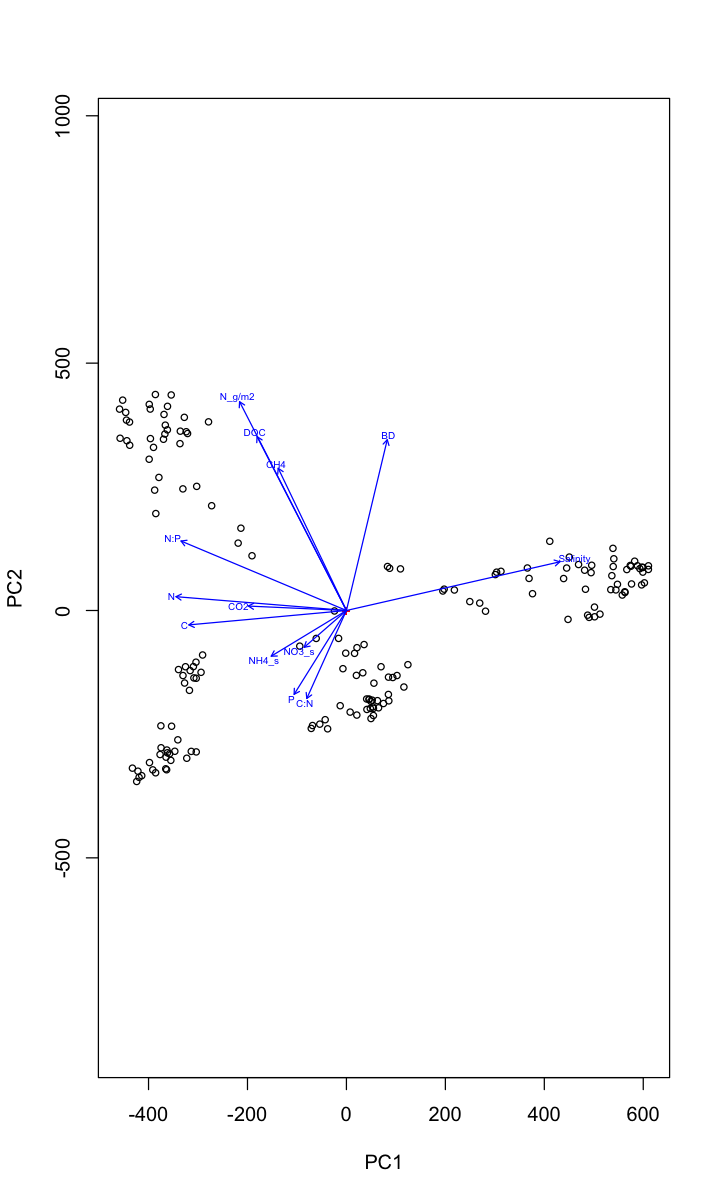

In [101]:
# Envfit
sum(rownames(Env_chem) != rownames(OTU_v))
set.seed(100)
ef <- envfit(d.pcx, Env_chem, permutations = 999, na.rm = TRUE)
ef
ordiplot(d.pcx)
plot(ef, p.max = 0.05, cex = 0.5)
arrow_factor <- ordiArrowMul(ef)
manual_factor <- 0.15
vec.df <- as.data.frame(ef$vectors$arrows*sqrt(ef$vectors$r)) %>%
  mutate(PC1 = PC1 * manual_factor,
         PC2 = PC2 * manual_factor) %>%
  mutate(variables = rownames(.)) %>%
  filter(ef$vectors$pvals < 0.05)

In [103]:
# Function for hull
find_hull <- function(df) df[chull(-df$Axis01, -df$Axis02),]

In [104]:
# Calc hulls
micro.hulls <- ddply(Meta_iTag, "Location", find_hull)

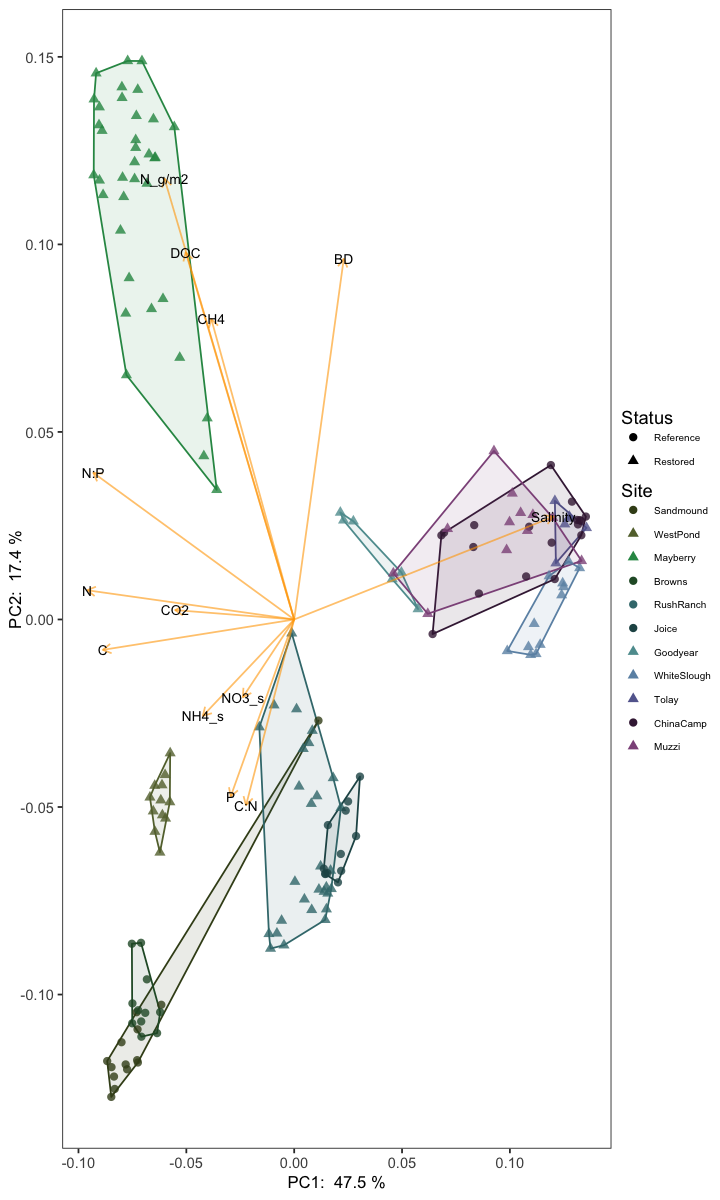

In [105]:
figure3c <- ggplot(Meta_iTag, aes(-Axis01, -Axis02, colour = Location)) +
    geom_polygon(data = micro.hulls, aes(colour = Location, fill = Location), 
                 alpha = 0.1, show.legend = F) +
    geom_point(size = 2, alpha = 0.8, aes(shape = EWcoastGroup)) +
    geom_segment(data = vec.df, aes(x = 0, xend = PC1, y = 0, yend = PC2), alpha = 0.6,
            arrow = arrow(length = unit(0.2, "cm")), colour = "orange") +
    geom_text(data = vec.df, aes(x = PC1, y = PC2, label = variables), size = 2.9, inherit.aes = F) +
    scale_fill_manual(values = site_col) +
    scale_colour_manual(values = site_col) +
    scale_shape_manual(values=c(16, 17), 
                       labels = c("Reference", "Restored")) +
    labs(x = PC1,
         y = PC2,
         colour = "Site",
         shape = "Status") +
    guides(colour = guide_legend(order = 2, override.aes = list(shape = c(16, 17, 17, 16, 16, 16, 17, 17, 17, 16, 17),
                                                                alpha = 1)),
           shape = guide_legend(order = 1, override.aes = list(alpha = 1))) +
    theme_bw() +
    theme(panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          #legend.title = element_blank(),
          legend.text = element_text(size = 6),
          legend.key.height = unit(0.5, "cm"),
          legend.key.width = unit(0.5, "cm"),
          legend.spacing.y = unit(0, "cm"),
          legend.margin = margin(5,0,0,0),
          legend.box.margin = margin(0,0,0,-5),
          axis.title.y = element_text(size = 10, margin = margin(t = 0, r = -2.5, b = 0, l = 0)),
          axis.title.x = element_text(size = 10))
figure3c

In [109]:
# Permanova
set.seed(100)
adonis2(aclr ~ Meta_iTag$Location, perm = 999)
set.seed(100)
adonis2(aclr ~ Meta_iTag$EWcoastGroup, perm = 999)
set.seed(100)
adonis2(aclr ~ Meta_iTag$Pl_Sp, perm = 999)
set.seed(100)
adonis2(aclr ~ Meta_iTag$Pl_Sp + Meta_iTag$Location, perm = 999)
set.seed(100)
adonis2(aclr ~ Meta_iTag$Location + Meta_iTag$Pl_Sp, perm = 999)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Meta_iTag$Location,10,2053590,0.6556707,29.89589,0.001
Residual,157,1078455,0.3443293,NA,NA
Total,167,3132045,1.0000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Meta_iTag$EWcoastGroup,1,197908.8,0.06318836,11.19677,0.001
Residual,166,2934136.7,0.93681164,NA,NA
Total,167,3132045.5,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Meta_iTag$Pl_Sp,6,1187882,0.3792672,16.39514,0.001
Residual,161,1944163,0.6207328,NA,NA
Total,167,3132045,1.0000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Meta_iTag$Pl_Sp,6,1187882.0,0.3792672,33.30507,0.001
Meta_iTag$Location,9,1040607.0,0.3322452,19.45058,0.001
Residual,152,903556.4,0.2884877,NA,NA
Total,167,3132045.5,1.0000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Meta_iTag$Location,10,2053590.4,0.65567068,34.546347,0.001
Meta_iTag$Pl_Sp,5,174898.6,0.05584166,5.884434,0.001
Residual,152,903556.4,0.28848765,NA,NA
Total,167,3132045.5,1.00000000,NA,NA


pdf 
  2

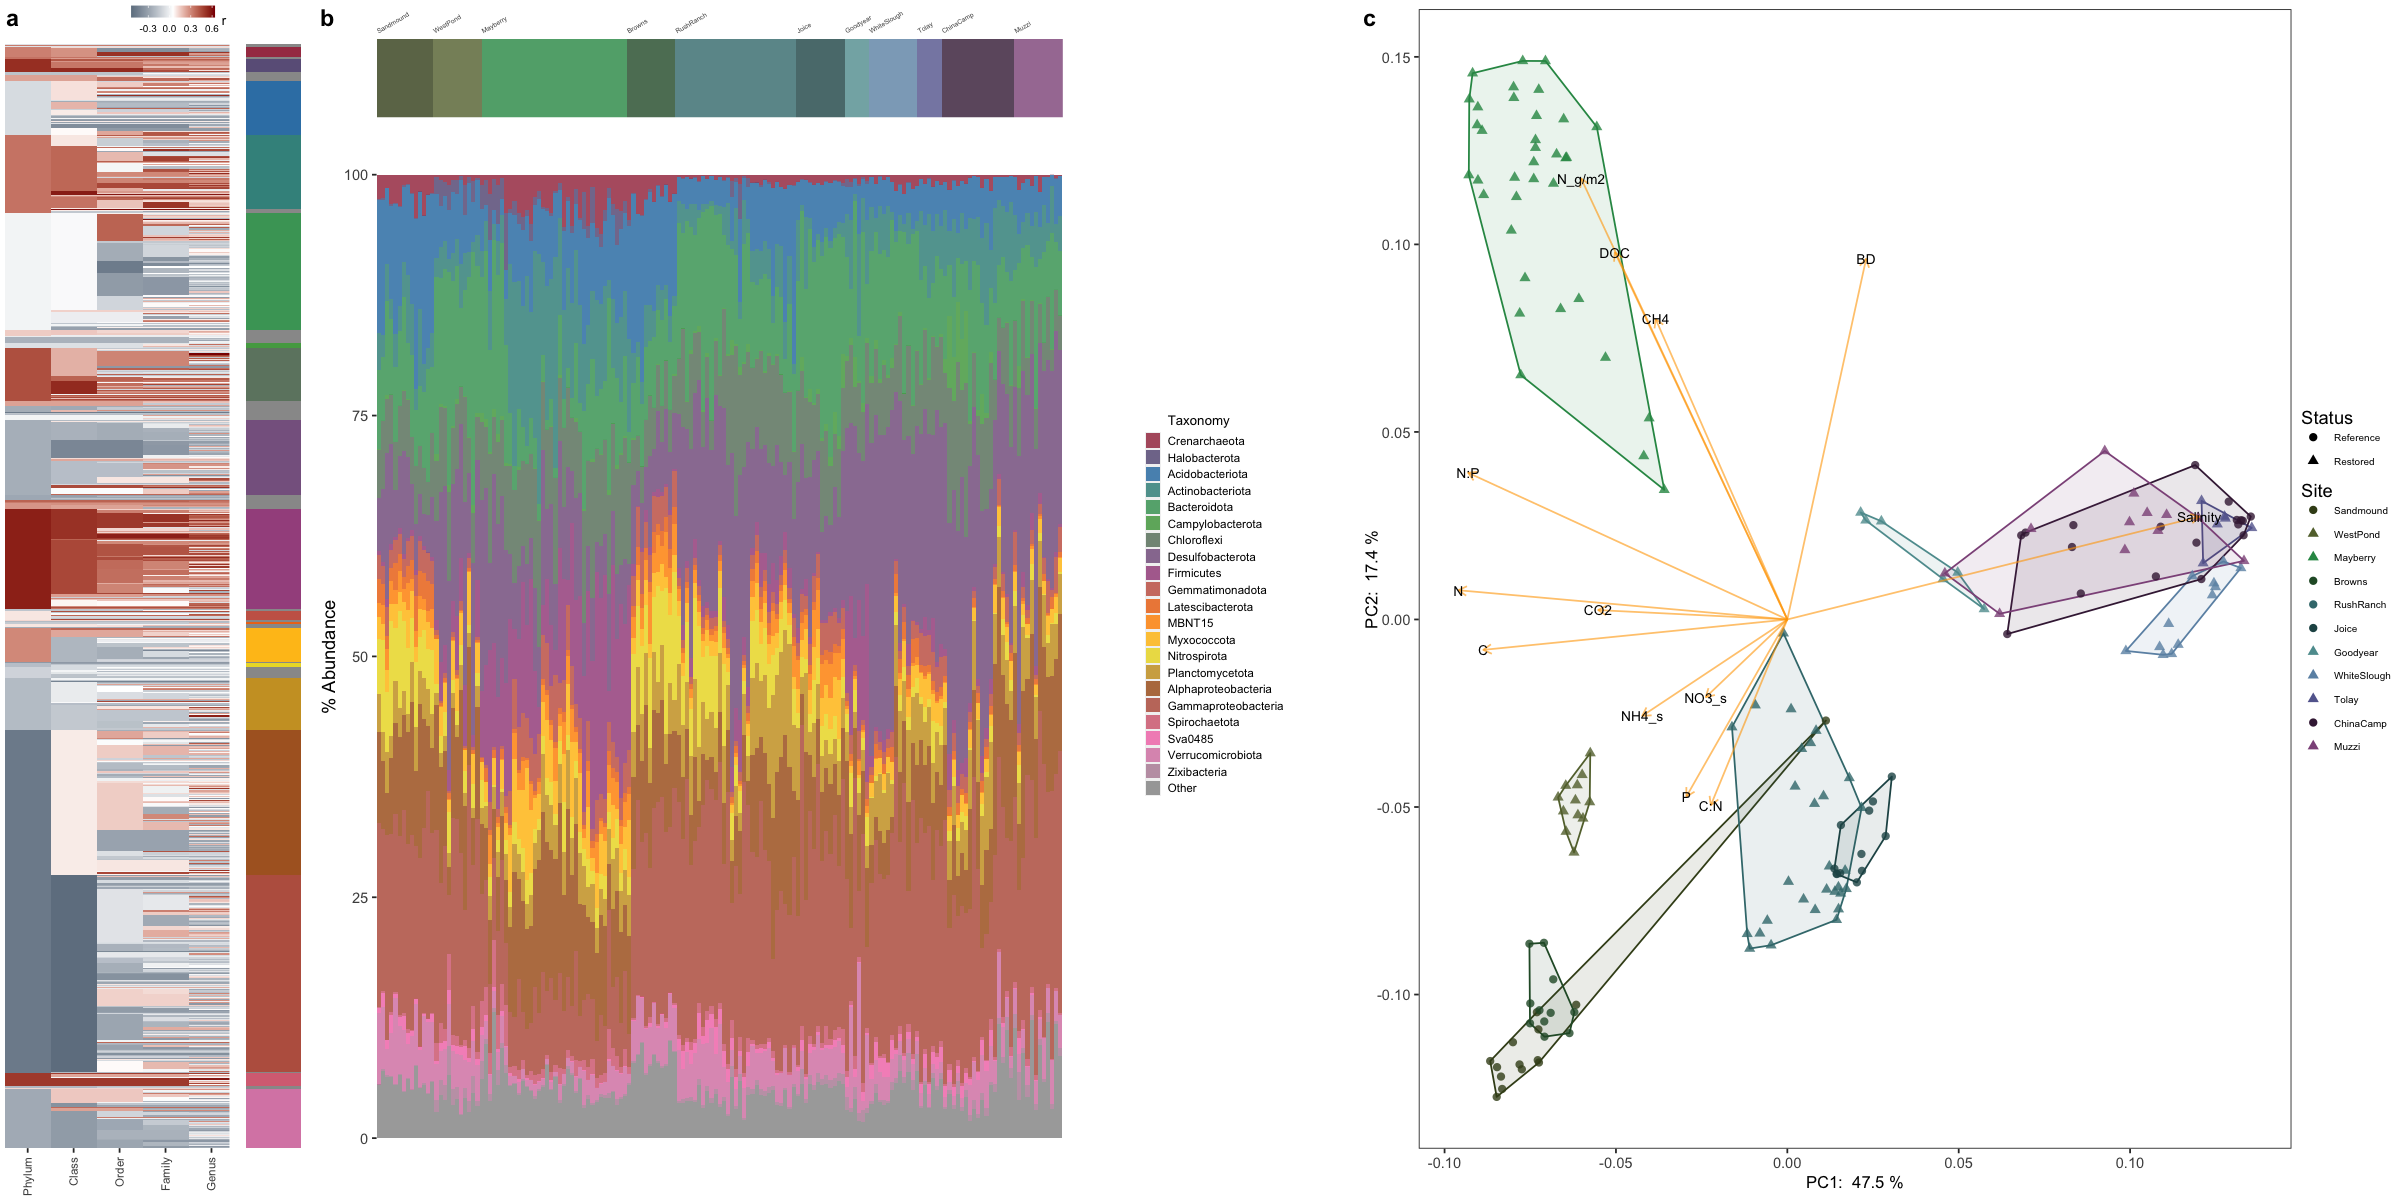

In [107]:
# New multipanel figure
options(repr.plot.width = 20, repr.plot.height = 10)
figure3 <- plot_grid(figure3a, figure3b, figure3c, ncol = 3, align = "hv", rel_widths = c(0.6, 2, 2), axis = "t",
                    labels = c("a", "b", "c"))
figure3

pdf("../figs/Figure3_aitchPCA.pdf", width = 11, height = 4)
figure3
dev.off()

# Figure S6

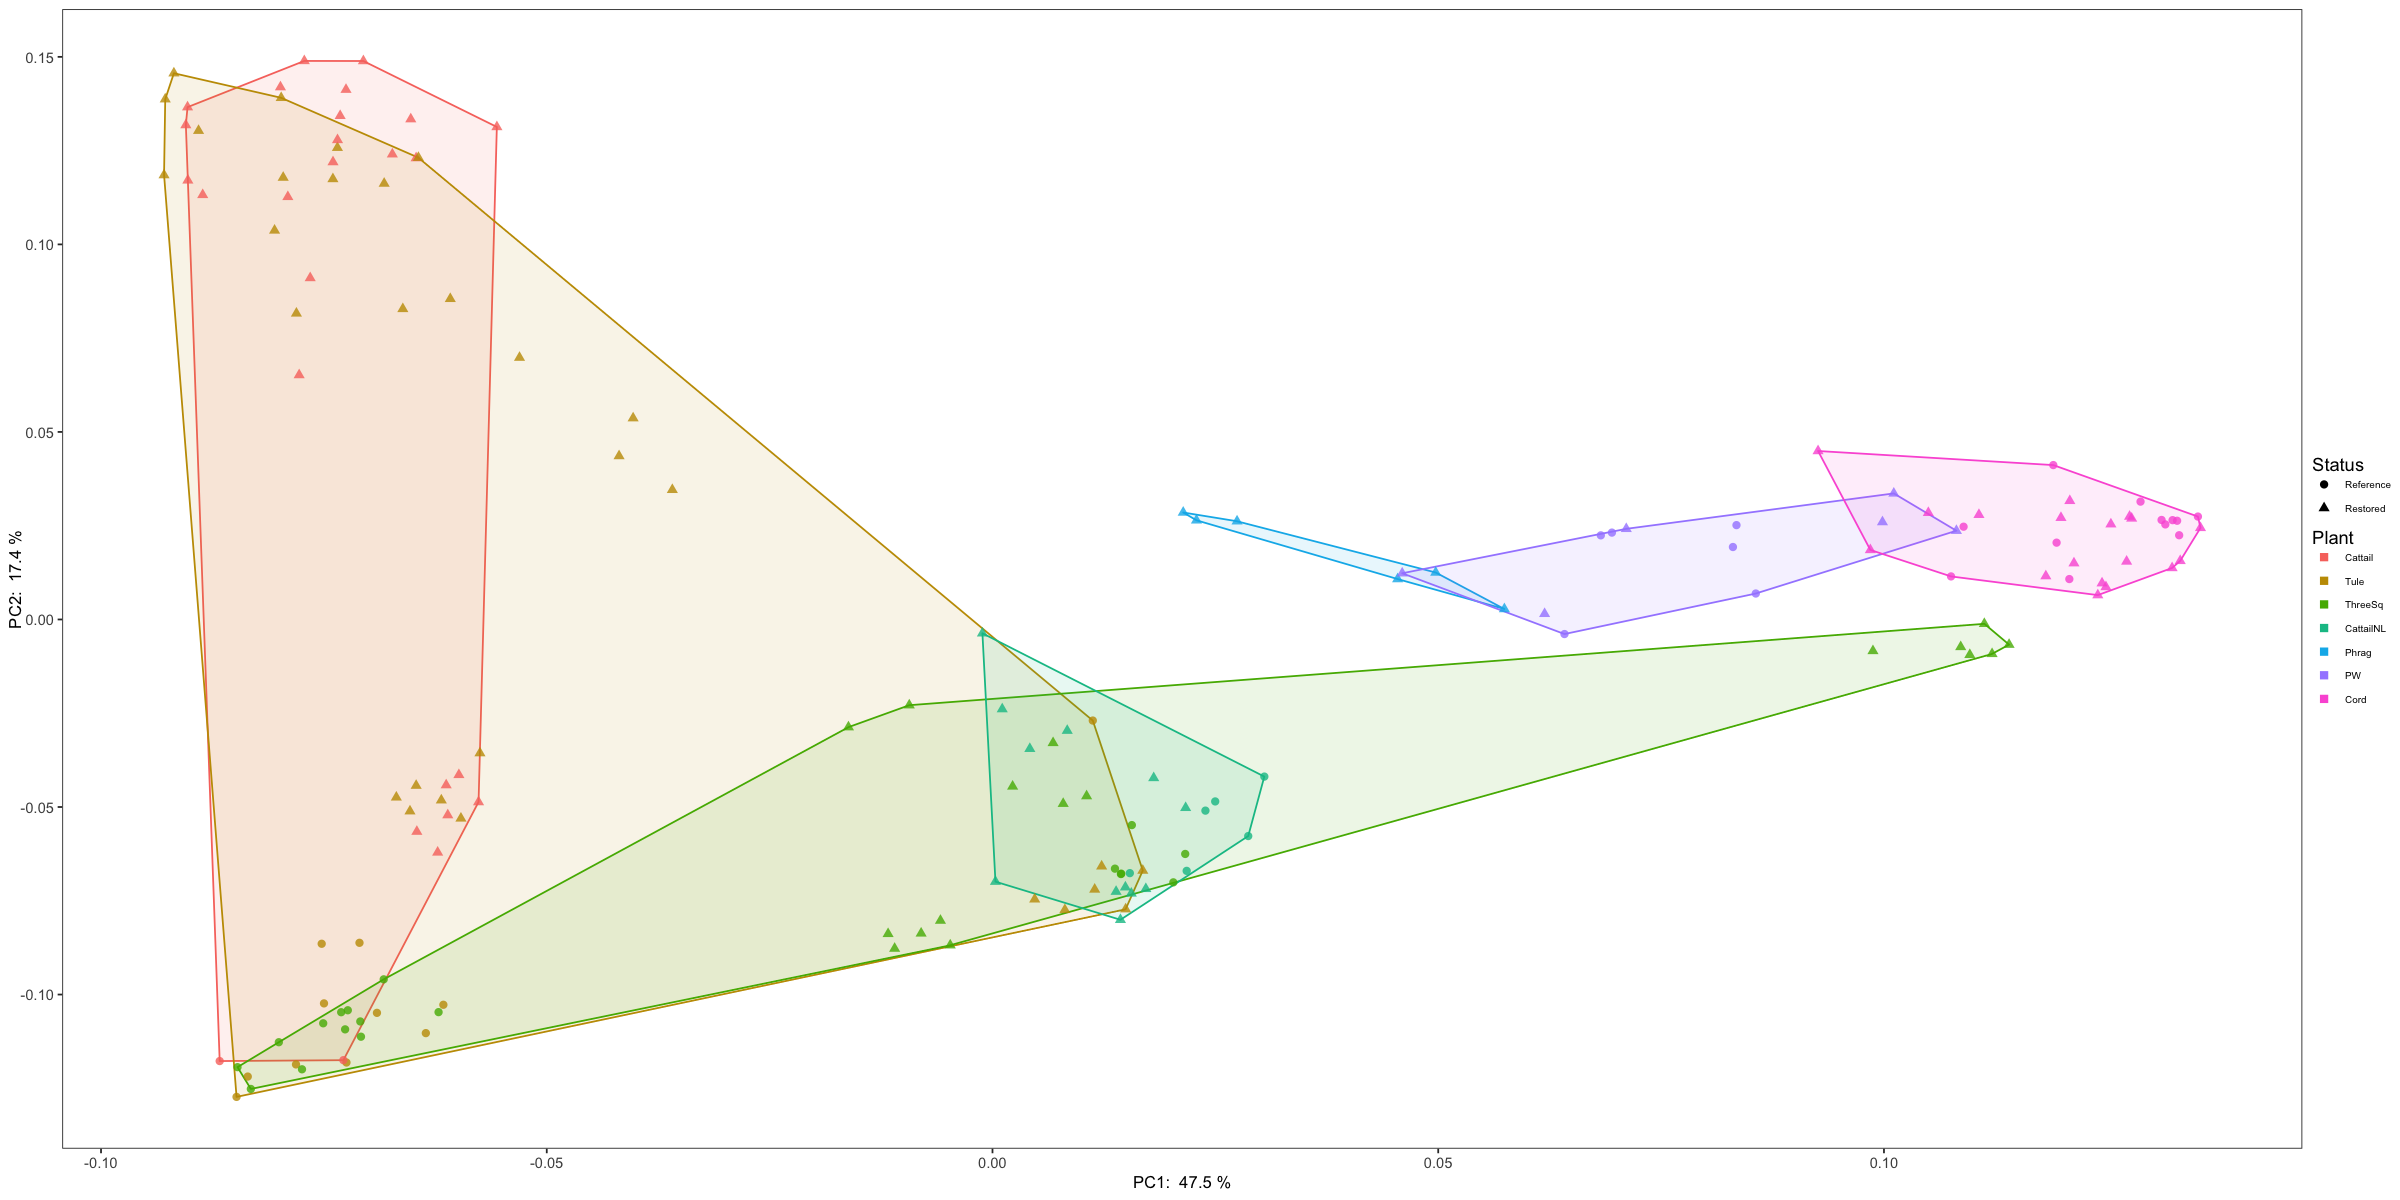

In [117]:
micro.hulls <- ddply(Meta_iTag, "Pl_Sp", find_hull)
figureS6 <- ggplot(Meta_iTag, aes(-Axis01, -Axis02, colour = Pl_Sp)) +
    geom_polygon(data = micro.hulls, aes(colour = Pl_Sp, fill = Pl_Sp), 
                 alpha = 0.1, show.legend = F) +
    geom_point(size = 2, alpha = 0.8, aes(shape = EWcoastGroup)) +
    scale_shape_manual(values=c(16, 17), 
                       labels = c("Reference", "Restored")) +
    labs(x = PC1,
         y = PC2,
         colour = "Plant",
         shape = "Status") +
    guides(colour = guide_legend(order = 2, override.aes = list(shape = 15, alpha = 1)),
           shape = guide_legend(order = 1, override.aes = list(alpha = 1))) +
    theme_bw() +
    theme(panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          #legend.title = element_blank(),
          legend.text = element_text(size = 6),
          legend.key.height = unit(0.5, "cm"),
          legend.key.width = unit(0.5, "cm"),
          legend.spacing.y = unit(0, "cm"),
          legend.margin = margin(5,0,0,0),
          legend.box.margin = margin(0,0,0,-5),
          axis.title.y = element_text(size = 10, margin = margin(t = 0, r = -2.5, b = 0, l = 0)),
          axis.title.x = element_text(size = 10))
figureS6

In [118]:
pdf("../figs/FigureS6_aitchPCA.pdf", width = 6, height = 4)
figureS6
dev.off()

pdf 
  2